# 折线图

使用 `pyplot` 创建一个折线图。当与 `ui.timer` 结合使用时，`push` 方法可以提供实时更新。

- `n`: 线条的数量
- `limit`: 每条线的最大数据点数（新点将替换最旧的点）
- `update_every`: 只有在推送新数据多次后才更新图表，以节省CPU和带宽
- `close`: 是否在退出上下文后关闭图形；如果你稍后想要更新它，请设置为 `False`（默认：`True`）
- `kwargs`: 应该传递给 [`pyplot.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) 的参数，如 `figsize``

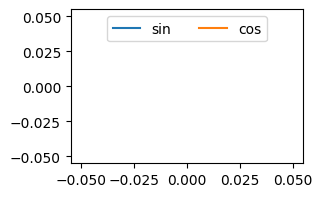

In [1]:
import math
from datetime import datetime
from nicegui import ui

line_plot = ui.line_plot(n=2, limit=20, figsize=(3, 2), update_every=5) \
    .with_legend(['sin', 'cos'], loc='upper center', ncol=2)

def update_line_plot() -> None:
    now = datetime.now()
    x = now.timestamp()
    y1 = math.sin(x)
    y2 = math.cos(x)
    line_plot.push([now], [[y1], [y2]])

line_updates = ui.timer(0.1, update_line_plot, active=False)
line_checkbox = ui.checkbox('active').bind_value(line_updates, 'active')

# ui.run()